### Step 1: Install & Import Required Libraries

In [4]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestRegressor
import plotly.express as px
import xgboost as xgb


### Step 2: Load Dataset

In [5]:
# Load your cleaned CSV file
df = pd.read_csv("agriculture.csv")

# Display a few rows
df.head()


,Date,Location,Weather_Condition,Temperature_C,Humidity_%,Soil_Moisture_%,Rainfall_mm,Agricultural_Tip
0,2022-01-01,Matabeleland South,Clear,35.5,40.6,13.7,0.6,Good conditions for pesticide application in e...
1,2022-01-02,Masvingo,Hot,20.2,59.4,24.7,0.8,Irrigate during cool hours (5-8 AM or 6-9 PM).
2,2022-01-03,Mashonaland Central,Hot,29.8,51.6,7.4,1.3,Use mulch to retain soil moisture.
3,2022-01-04,Manicaland,Hot,22.5,79.9,5.4,0.7,Consider heat-resistant crop varieties.
4,2022-01-05,Bulawayo,Clear,19.6,89.0,36.5,0.2,Good conditions for pesticide application in e...


### Step 3: Encode Labels and Clean Features

In [6]:
# Encode the categorical tips into numeric class labels
le = LabelEncoder()
df['Tip_Label'] = le.fit_transform(df['Agricultural_Tip'])

# Encode Weather_Condition
df['Weather_Code'] = LabelEncoder().fit_transform(df['Weather_Condition'])

# Define features and label
features = ['Rainfall_mm', 'Humidity_%', 'Soil_Moisture_%', 'Temperature_C', 'Weather_Code']
X = df[features]
y = df['Tip_Label']


### Step 4: Train-Test Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Step 5: Random Forest Classifier for Tip Prediction

In [8]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.31      0.44      0.36         9
           1       0.56      0.45      0.50        11
           2       0.38      0.25      0.30        12
           3       0.32      0.55      0.40        11
           4       0.17      0.33      0.23        12
           5       0.33      0.10      0.15        10
           6       0.43      0.27      0.33        11
           7       1.00      0.14      0.25         7
           8       0.32      0.60      0.41        10
           9       0.53      0.43      0.47        21
          10       0.29      0.18      0.22        11
          11       0.27      0.36      0.31        11
          12       0.29      0.20      0.24        10
          13       0.38      0.25      0.30        12
          14       0.50      0.50      0.50        10
          15       0.35      0.64      0.45        11
          16       0.40      0.40      0.40        10
          17       0.25    

### Step 6: Confusion Matrix & Visualisation

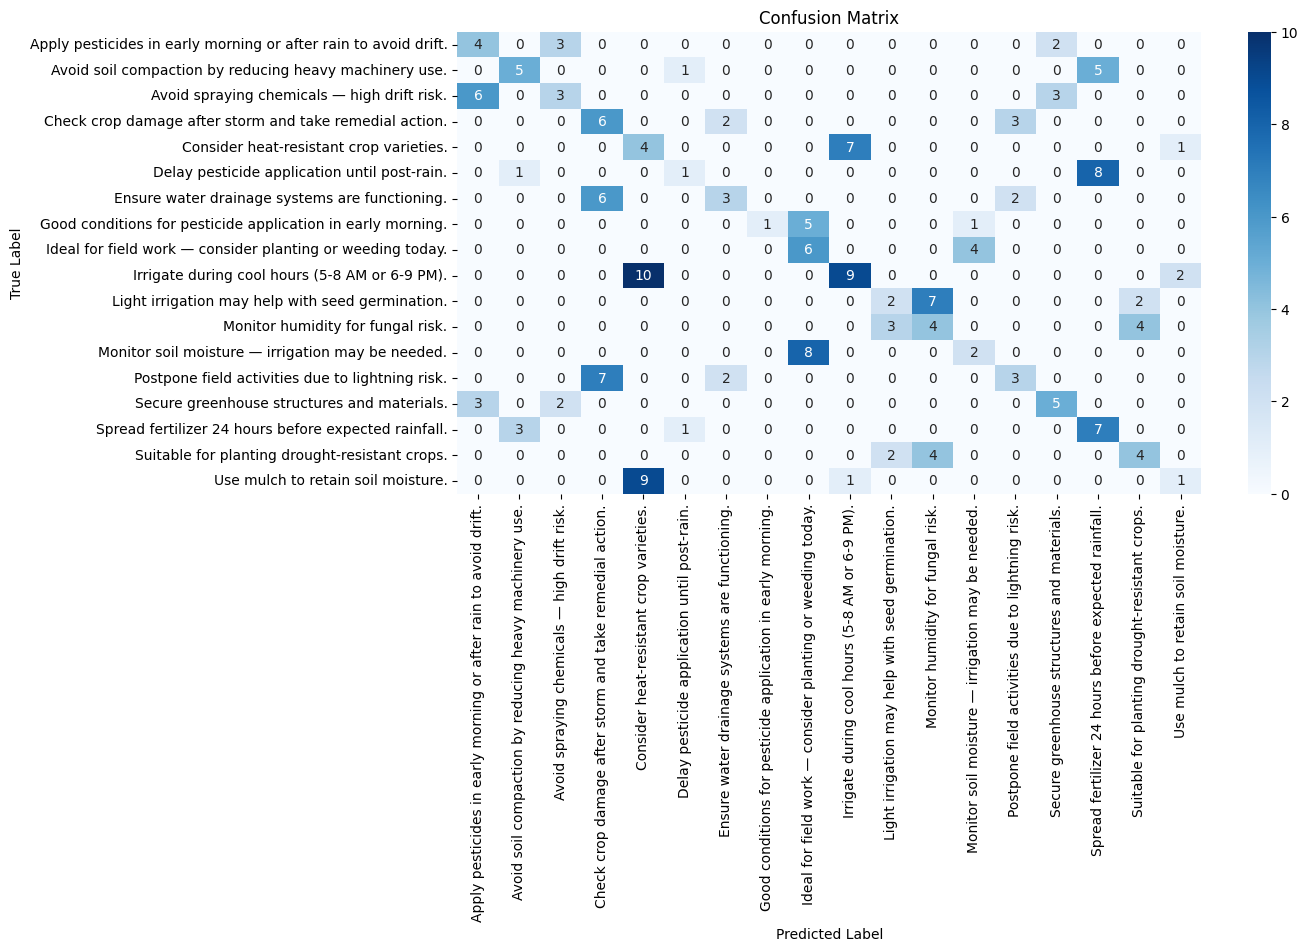

In [9]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()


### Step 7: Bar Chart of Feature Importance (Random Forest)

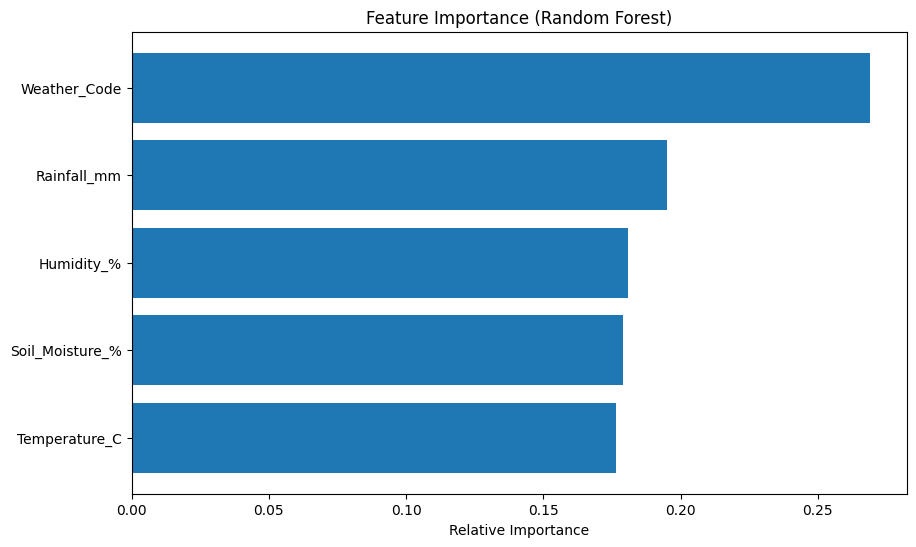

In [10]:
importances = clf.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title("Feature Importance (Random Forest)")
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()


### Step 8: Correlation Matrix of Features

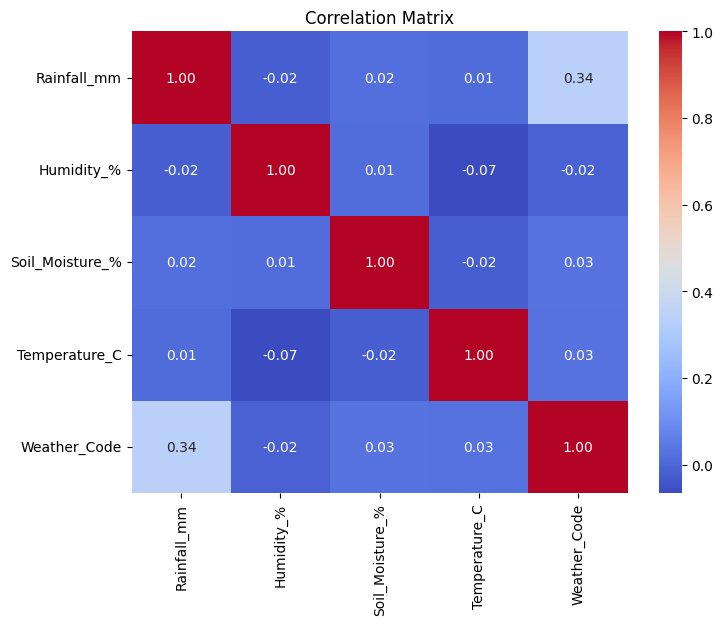

In [11]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


### Step 9: Histogram of Daily Rainfall Amounts

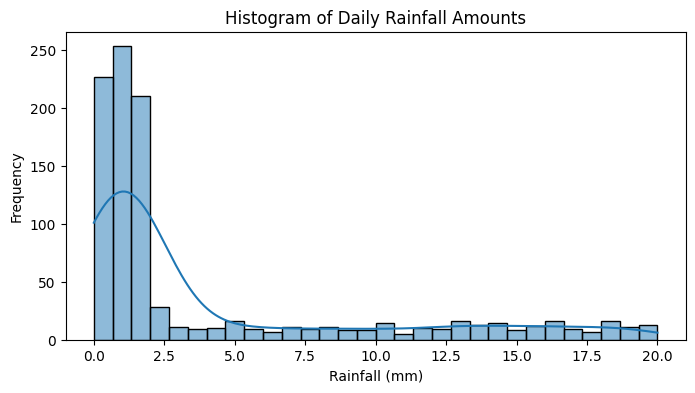

In [12]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Rainfall_mm'], bins=30, kde=True)
plt.title("Histogram of Daily Rainfall Amounts")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Frequency")
plt.show()


### Step 10: Box Plot of Seasonal Temperature Variation

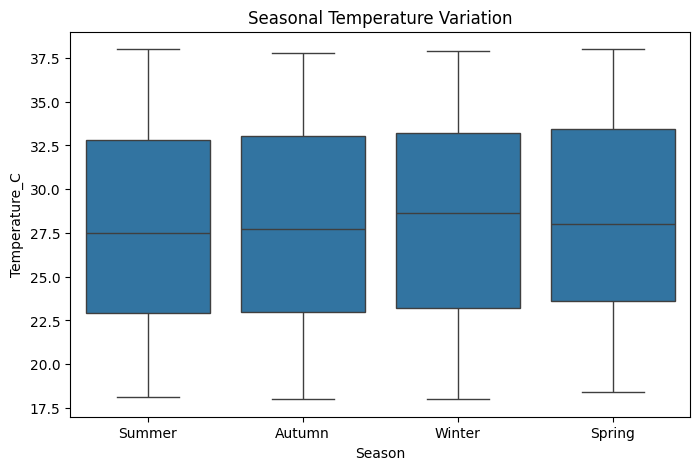

In [13]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month

def get_season(month):
    if month in [12, 1, 2]:
        return 'Summer'
    elif month in [3, 4, 5]:
        return 'Autumn'
    elif month in [6, 7, 8]:
        return 'Winter'
    else:
        return 'Spring'

df['Season'] = df['Month'].apply(get_season)

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Season', y='Temperature_C')
plt.title("Seasonal Temperature Variation")
plt.show()


### Step 11: Scatter Plot Matrix (Pairwise Relationships)

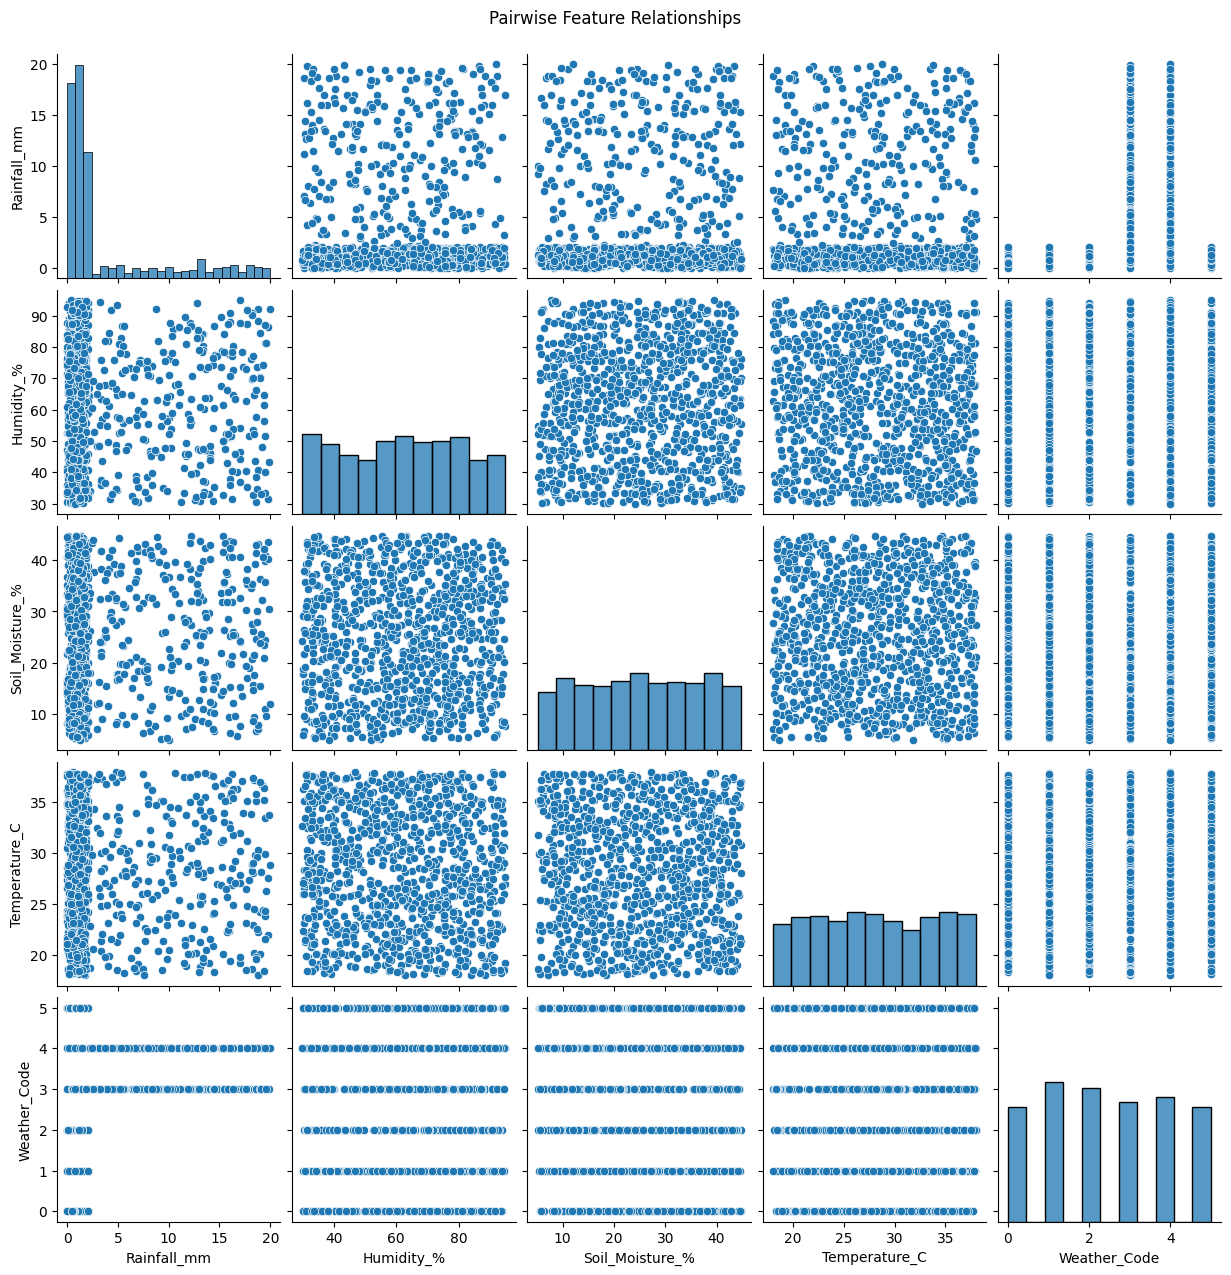

In [14]:
sns.pairplot(df[features])
plt.suptitle("Pairwise Feature Relationships", y=1.02)
plt.show()


###  Step 12: Microclimate Trend Map (Rainfall by Location)

In [19]:
import plotly.express as px
fig = px.box(df, x='Location', y='Rainfall_mm', title="Rainfall Distribution by Location", height=500)
import plotly.io as pio
pio.renderers.default = 'browser'  # This opens the plot in your default web browser

fig.show()


### Step 13: Train Multiple Models

In [20]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    acc = accuracy_score(y_test, pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")


Random Forest Accuracy: 0.3500


c:\Users\Faraimunashe\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning:

[04:36:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




XGBoost Accuracy: 0.3200
SVM Accuracy: 0.0950
KNN Accuracy: 0.1050


### Step 14: Visualise Model Performance Comparison

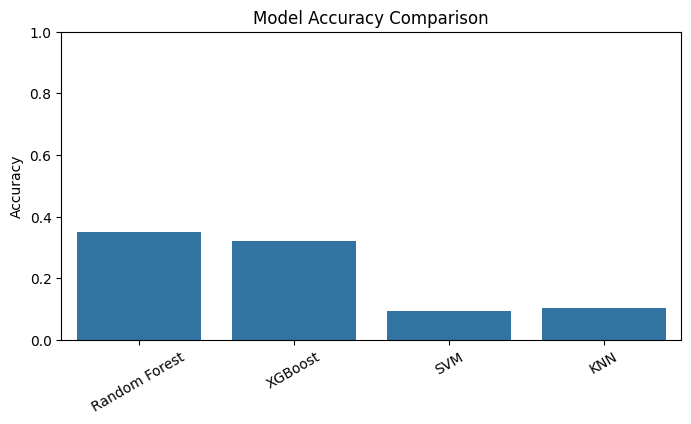

In [21]:
plt.figure(figsize=(8, 4))
plt.title("Model Accuracy Comparison")
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xticks(rotation=30)
plt.show()


### Step 15: Cross-Validation Score Summary

In [26]:
from sklearn.model_selection import cross_val_score

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5)

    print(f"{name} CV Mean: {scores.mean():.4f}, Std: {scores.std():.4f}")


Random Forest CV Mean: 0.9667, Std: 0.0211
XGBoost CV Mean: 0.9533, Std: 0.0163
SVM CV Mean: 0.9667, Std: 0.0211
KNN CV Mean: 0.9600, Std: 0.0249


### Step 16: Save the Best Model

In [27]:
import joblib
joblib.dump(clf, "best_agriculture_model.pkl")


['best_agriculture_model.pkl']

### Step 17: Predict Agricultural Tip for New Data

In [28]:
# Example input (replace with live weather forecast)
example = pd.DataFrame([{
    'Rainfall_mm': 10,
    'Humidity_%': 65,
    'Soil_Moisture_%': 30,
    'Temperature_C': 28,
    'Weather_Code': LabelEncoder().fit(df['Weather_Condition']).transform(['Rain'])[0]
}])

predicted_label = clf.predict(example)[0]
predicted_tip = le.inverse_transform([predicted_label])[0]
print("Predicted Agricultural Tip:", predicted_tip)


Predicted Agricultural Tip: Spread fertilizer 24 hours before expected rainfall.


### Step 18: Detect Outliers in Weather Data

In [33]:
import pandas as pd
import scipy.stats as stats

# Assuming your DataFrame is named df_large

# Define the numeric features to test
numeric_features = ["Rainfall_mm", "Humidity_%", "Soil_Moisture_%", "Temperature_C"]

# Grouping column
group_column = "Weather_Condition"

# Store results in a list
summary_rows = []

# Perform ANOVA (F-test) for each numeric feature grouped by Weather Condition
for feature in numeric_features:
    # Extract data for each group
    grouped_data = [group[feature].values for name, group in df.groupby(group_column)]
    
    # Run one-way ANOVA
    stat, p_value = stats.f_oneway(*grouped_data)
    
    # Append results
    summary_rows.append({
        "Feature": feature,
        "Test": "ANOVA",
        "F-Statistic": round(stat, 3),
        "p-Value": round(p_value, 5),
        "Significant (p<0.05)": "Yes" if p_value < 0.05 else "No"
    })

# Convert results to a DataFrame
summary_df = pd.DataFrame(summary_rows)

# Display the result
print(summary_df)


           Feature   Test  F-Statistic  p-Value Significant (p<0.05)
0      Rainfall_mm  ANOVA      320.488  0.00000                  Yes
1       Humidity_%  ANOVA        1.186  0.31376                   No
2  Soil_Moisture_%  ANOVA        0.337  0.89053                   No
3    Temperature_C  ANOVA        1.237  0.28933                   No


#### Bar Chart Of Feature Importance Scores

C:\Users\Faraimunashe\AppData\Local\Temp\ipykernel_16212\4180505474.py:29: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




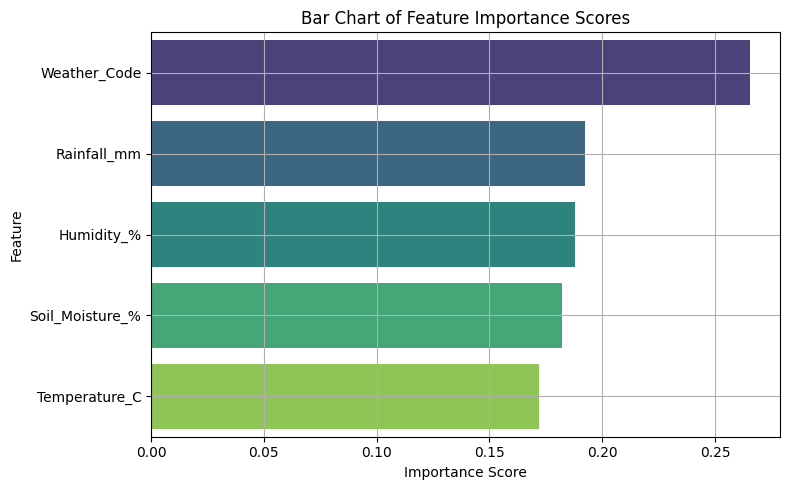

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Encode labels
df['Tip_Label'] = LabelEncoder().fit_transform(df['Agricultural_Tip'])
df['Weather_Code'] = LabelEncoder().fit_transform(df['Weather_Condition'])

# Define features and target
features = ['Rainfall_mm', 'Humidity_%', 'Soil_Moisture_%', 'Temperature_C', 'Weather_Code']
X = df[features]
y = df['Tip_Label']

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Extract feature importances
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot the bar chart
plt.figure(figsize=(8, 5))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette="viridis")
plt.title("Bar Chart of Feature Importance Scores")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.grid(True)
plt.tight_layout()
plt.show()
